<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-ascendante-hiérarchique-(CAH)" data-toc-modified-id="Classification-ascendante-hiérarchique-(CAH)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification ascendante hiérarchique (CAH)</a></span></li><li><span><a href="#Clustering-Kmeans" data-toc-modified-id="Clustering-Kmeans-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering Kmeans</a></span><ul class="toc-item"><li><span><a href="#Choix-des-clusters" data-toc-modified-id="Choix-des-clusters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Choix des clusters</a></span><ul class="toc-item"><li><span><a href="#Méthode-du-coude" data-toc-modified-id="Méthode-du-coude-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Méthode du coude</a></span></li><li><span><a href="#Méthode-des-coefficient-des-silhouette" data-toc-modified-id="Méthode-des-coefficient-des-silhouette-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Méthode des coefficient des silhouette</a></span></li><li><span><a href="#Librarie-Yellowbrick" data-toc-modified-id="Librarie-Yellowbrick-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Librarie Yellowbrick</a></span></li><li><span><a href="#Méthode-de-calinski-harabasz" data-toc-modified-id="Méthode-de-calinski-harabasz-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Méthode de calinski harabasz</a></span></li></ul></li><li><span><a href="#Interprétation-des-centroïds" data-toc-modified-id="Interprétation-des-centroïds-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Interprétation des centroïds</a></span></li></ul></li><li><span><a href="#Choix-des-clusters" data-toc-modified-id="Choix-des-clusters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choix des clusters</a></span></li></ul></div>

In [1]:
# importation des librairies
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# ACP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering CAH
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Clustering Kmeans
from sklearn.cluster import KMeans

In [2]:
%%HTML
<script src="require.js"></script>

In [3]:
data_pca_df = pd.read_csv('csv/data.csv')
code = pd.read_csv('csv/code.csv')


# Classification ascendante hiérarchique (CAH)

Nous allons à l’aide de la Classification ascendante hiérarchique (CAH), regroupé les pays en clusters 

On crée un nouveau DF pour le clustering CAH

In [4]:
new = data_pca_df.set_index('Zone')
new.head()

Consommation  population/-Stabilité  Auto suffisance  \
Zone                                                         
AFG      -1.281284               2.826478         0.666217   
AGO      -1.003240               1.137784        -0.218745   
ALB      -1.016787              -0.397257        -0.450823   
ARE      -0.353096              -2.130925        -0.087835   
ARG       3.629914              -0.553012        -0.866179   

      Dépendance à l’importation  
Zone                              
AFG                     0.922095  
AGO                     2.014904  
ALB                     0.160405  
ARE                     0.753561  
ARG                    -0.557244

On visualise nos clusters sur un dendrogramme

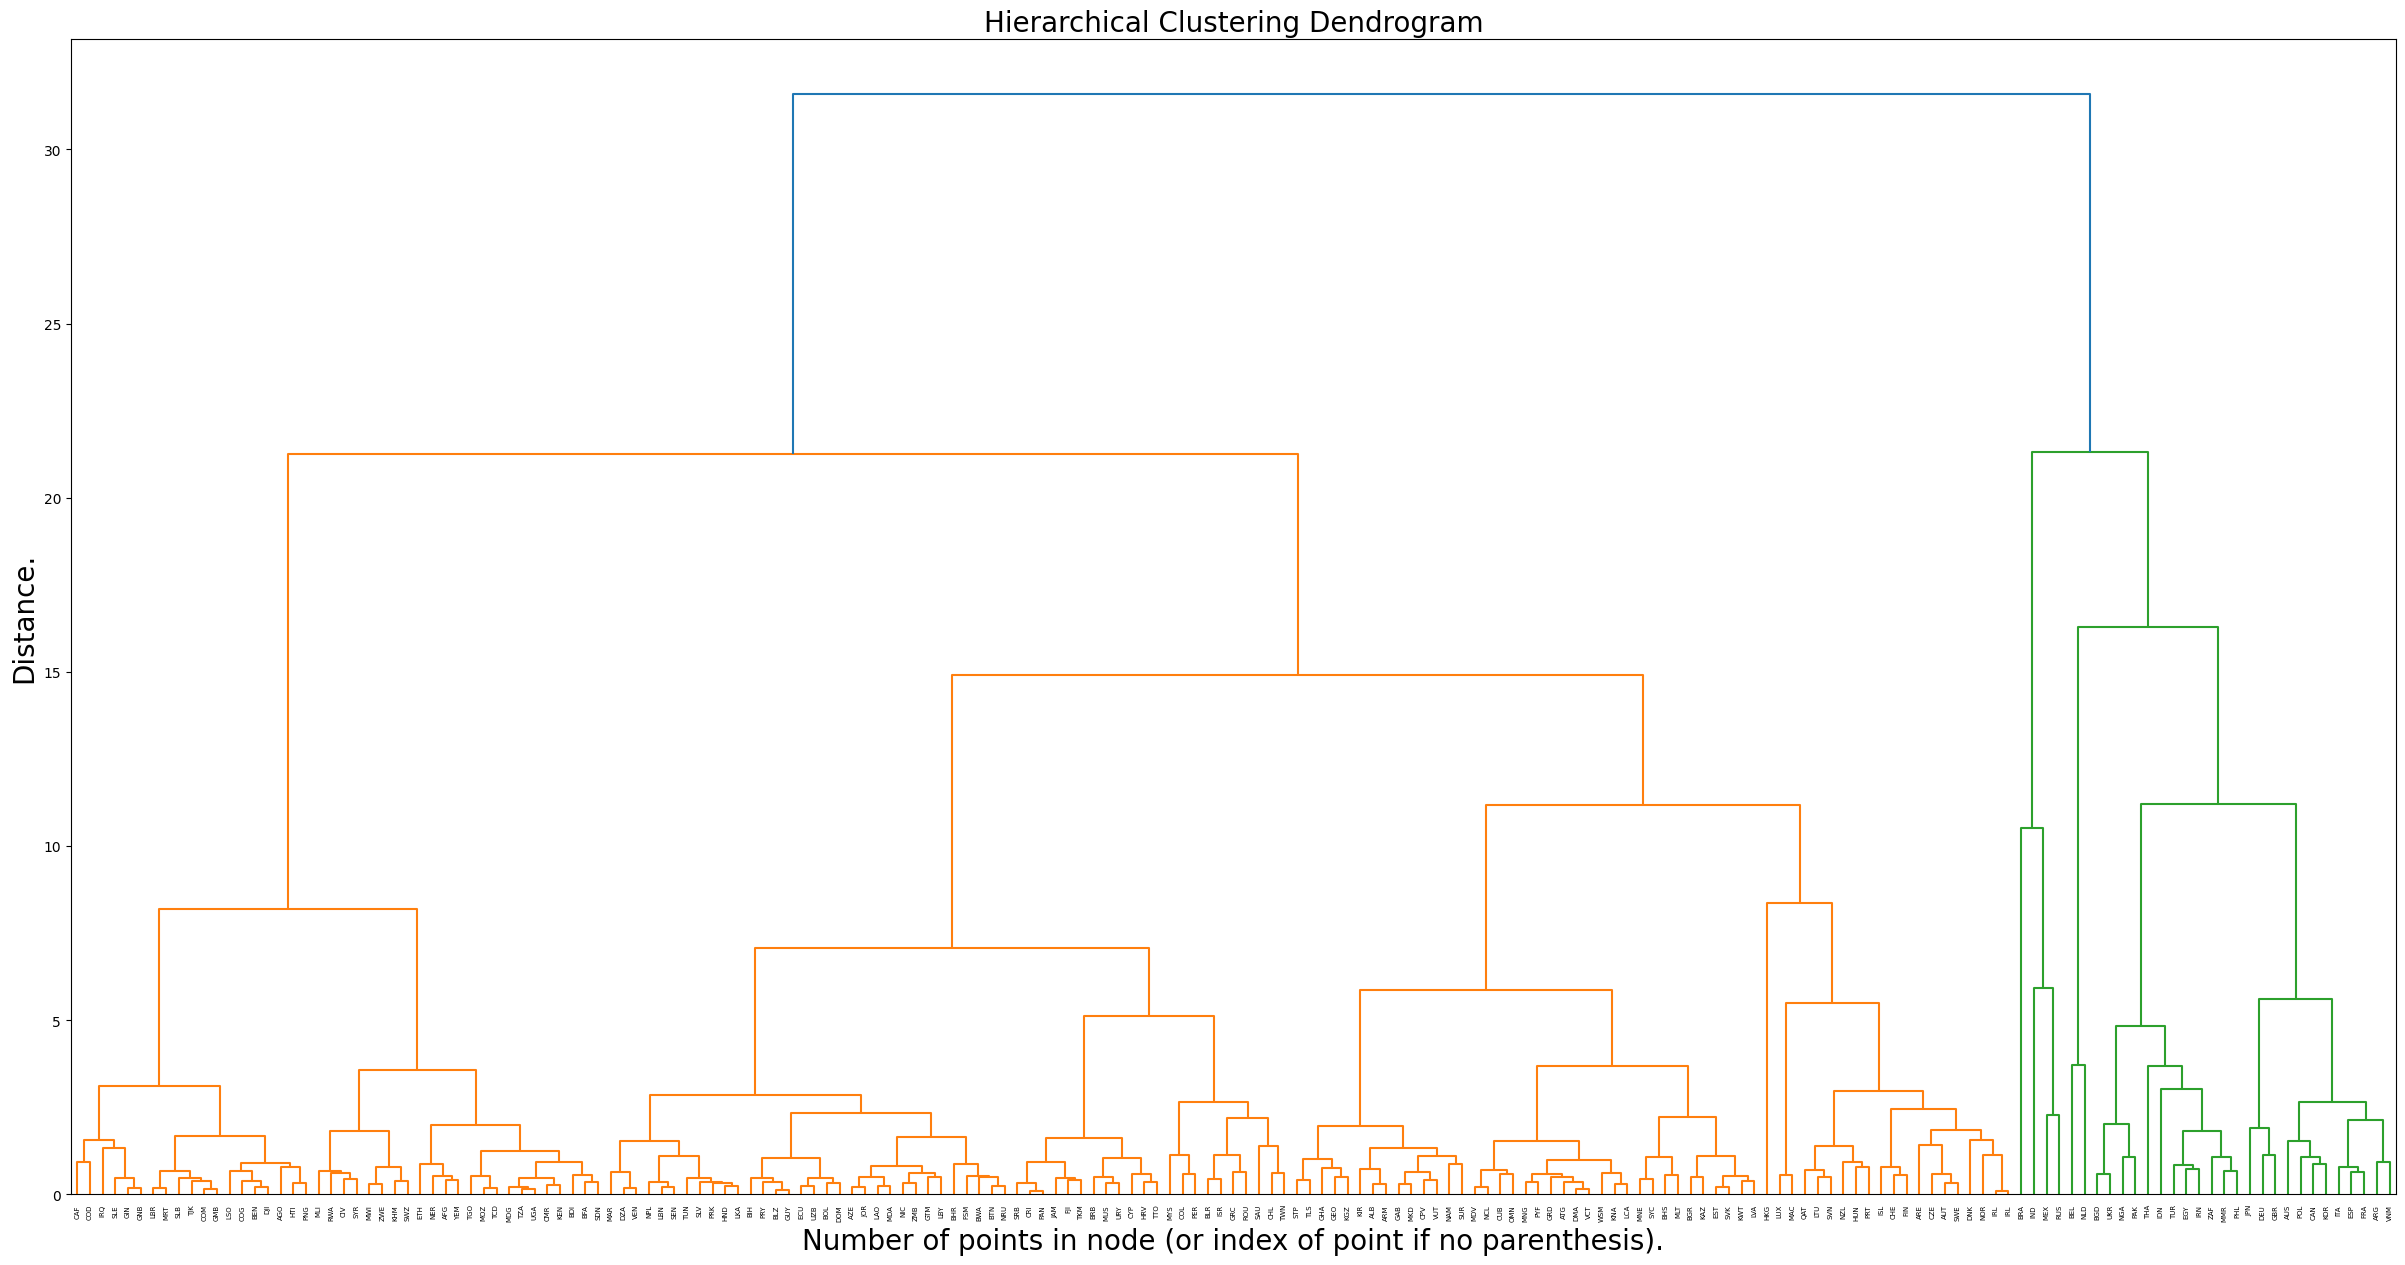

In [5]:
S = new.values
fig, ax = plt.subplots(1, 1, figsize=(30,15))

dendrogram = sch.dendrogram(sch.linkage(S, method = 'ward'), labels = new.index)

plt.title("Hierarchical Clustering Dendrogram", size = 20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).", size = 20)
plt.ylabel("Distance.", size = 20)
plt.show()

Le dendrogramme nous renvoie 2 clusters, nous allons étudier l’inertie à l’aide de la méthode du coude pour faire notre choix de nombre de clusters.

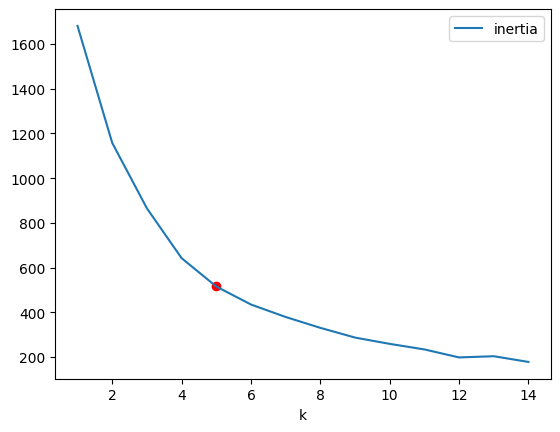

In [6]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(S)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 15), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(5, inertia.query('k ==5')["inertia"], c = "red")
plt.show()

Nous constatant une première perte d’inertie à 4 clusters et une deuxième à 6.

Pour rester sur cet intervalle, nous optons pour un choix de 5 clusters.

In [7]:
agg_clustering = AgglomerativeClustering(n_clusters = 5, linkage="ward")

In [8]:
agg_clustering.fit(new)

AgglomerativeClustering(n_clusters=5)

In [9]:
new['label_cah'] = agg_clustering.labels_
new

Consommation  population/-Stabilité  Auto suffisance  \
Zone                                                         
AFG      -1.281284               2.826478         0.666217   
AGO      -1.003240               1.137784        -0.218745   
ALB      -1.016787              -0.397257        -0.450823   
ARE      -0.353096              -2.130925        -0.087835   
ARG       3.629914              -0.553012        -0.866179   
...            ...                    ...              ...   
WSM      -1.088326              -1.649199        -1.555651   
YEM      -1.013075               2.775755         0.766252   
ZAF       2.044282               0.250846        -0.341515   
ZMB      -0.857656               0.700642         0.146267   
ZWE      -0.928270               1.432199         0.160624   

      Dépendance à l’importation  label_cah  
Zone                                         
AFG                     0.922095          3  
AGO                     2.014904          3  
ALB                     0.160405          0  
ARE                     0.753561          0  
ARG                    -0.557244          1  
...                          ...        ...  
WSM                     1.055709          0  
YEM                     0.612886          3  
ZAF                    -0.023564          1  
ZMB                    -0.514238          0  
ZWE                    -0.146039          3  

[183 rows x 5 columns]

Après avoir réparti les pays sur 5 clusters, nous pouvons observer cette réparation sur les 2 premier plan factoriel.

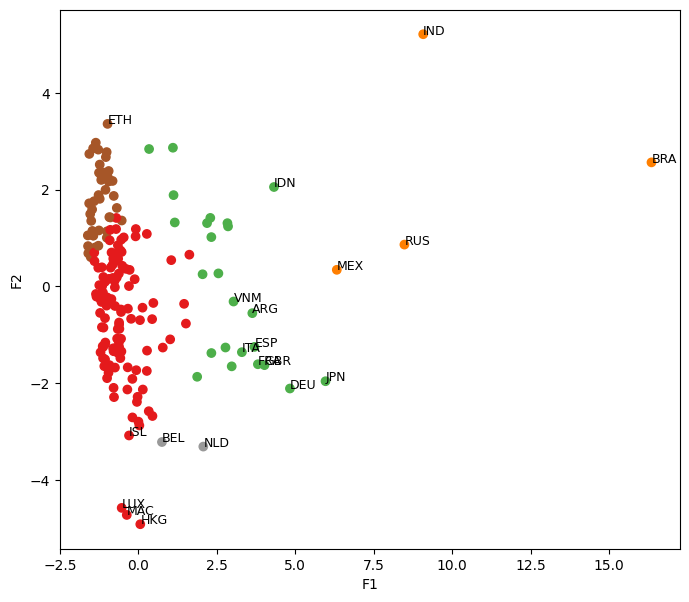

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(new.iloc[:, 0], new.iloc[:, 1], c= agg_clustering.labels_, cmap="Set1")
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Consommation']) > 3) | (abs(k[1]['population/-Stabilité']) > 3):
        ax.annotate(k[1]["Zone"], (k[1]['Consommation'], k[1]['population/-Stabilité']), fontsize = 9)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

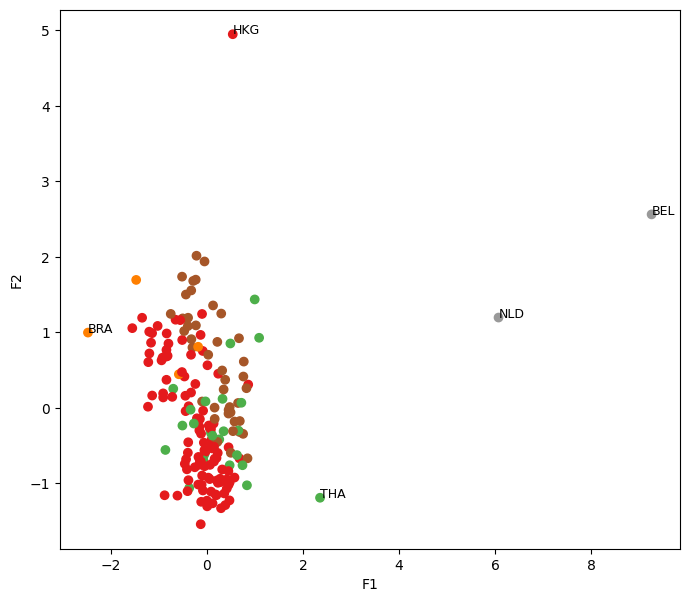

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(new.iloc[:, 2], new.iloc[:, 3], c= agg_clustering.labels_, cmap="Set1")
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Auto suffisance']) > 1.8) | (abs(k[1]['Dépendance à l’importation']) > 3):
        ax.annotate(k[1]["Zone"], (k[1]['Auto suffisance'], k[1]['Dépendance à l’importation']), fontsize = 9)
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

Après avoir réparti les pays sur 5 clusters, nous pouvons observer cette réparation sur les 2 premiers plans factoriels.

Nous allons à l'aide d’un box plot observer les variabilités de chaque cluster sur les différents axes.

In [12]:
px.box(new.sort_values('label_cah') , points ='outliers', color = 'label_cah', hover_data=[new.sort_values('label_cah').index])

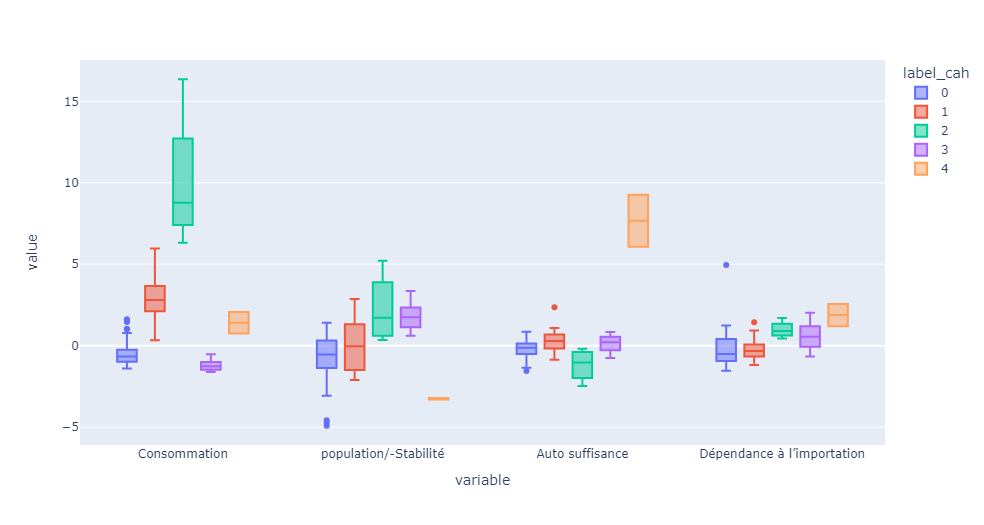

Nous avons le cluster 0 et cluster 3, qui sont très peu consommateur de viande, avec une certaine instabilité et un PIB moindre sur le 3. Elles constituent un très petit marché.

Le cluster 2 représente les plus gros pays consommateurs de viande suivie du cluster 1, on notera une meilleure stabilité plus fort PIB sur le 1 que sur le 2 et une dépendance à l’importation plus élevée sur le 2 et que sur le 1.

Enfin le cluster 4 qui regroupe les pays avec un taux d’auto-suffisance très élevé, mais aussi un taux de dépendance à l'importation les plus important par rapport aux autres clusters.

Nous pouvons conclure sur cette première analyse la présence d’un marché sur les clusters 1, 2 et 4

Un plus grand marché sur le cluster 2, mais plus instable.

Le cluster 1 deuxième plus gros consommateur semble un peu plus autosuffisant et moins dépendant à la consommation avec une meilleure stabilité que le cluster 2

Le cluster 4 semble apporter le plus de stabilité, malgré le fort taux d’autosuffisance, il reste le plus dépendant à l’importation que les autres clusters, il pourrait présenter un potentiel, mais risque d’être un peu concurrentiel.

In [13]:
for i in range(5):
    print('Label_cah', i)
    print(code[code['Code zone (ISO3)_'].isin(new[new.label_cah == i].index.tolist())]['Zone_'].tolist())
    print()

Label_cah 0
['Albanie', 'Émirats arabes unis', 'Arménie', 'Antigua-et-Barbuda', 'Autriche', 'Azerbaïdjan', 'Bulgarie', 'Bahreïn', 'Bahamas', 'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bolivie (État plurinational de)', 'Barbade', 'Bhoutan', 'Botswana', 'Suisse', 'Chili', 'Colombie', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Chypre', 'Tchéquie', 'Dominique', 'Danemark', 'République dominicaine', 'Algérie', 'Équateur', 'Estonie', 'Finlande', 'Fidji', 'Micronésie (États fédérés de)', 'Gabon', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guyana', 'Chine - RAS de Hong-Kong', 'Honduras', 'Croatie', 'Hongrie', 'Irlande', 'Irlande', 'Islande', 'Israël', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kirghizistan', 'Kiribati', 'Saint-Kitts-et-Nevis', 'Koweït', 'République démocratique populaire lao', 'Liban', 'Libye', 'Sainte-Lucie', 'Sri Lanka', 'Lituanie', 'Luxembourg', 'Lettonie', 'Chine - RAS de Macao', 'Maroc', 'République de Moldova', 'Maldives', 'Macédoine du Nord', 'Malte', 'Monténégro', 'M

Nous retiendrons le cluster 1 comme un meilleur candidat en vue de sa meilleure stabilité et PIB par habitant.

# Clustering Kmeans

Nous allons procéder un autre découpage de nos pays en cluster avec l’algorithme k-means  

In [14]:
new2 = data_pca_df.set_index('Zone')

## Choix des clusters

Pour choisir le nombre de clusters, nous allons combiner plusieurs méthodes.

### Méthode du coude

In [15]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(new2)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

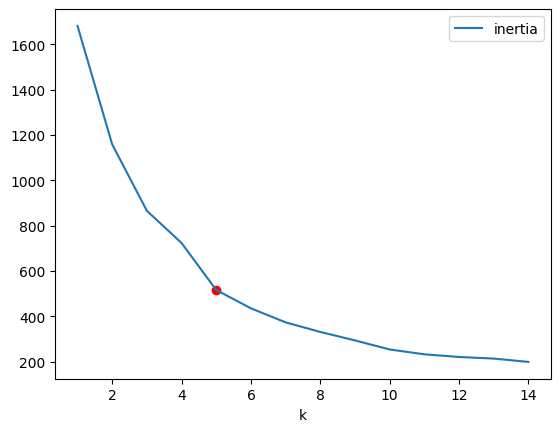

In [16]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(new2)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 15), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(5, inertia.query('k ==5')["inertia"], c = "red")
plt.show()

In [17]:
for i in range(1,10):
    print(i, intertia_list[i-1] )

1 1680.8825572419535
2 1157.948896337179
3 865.1502397010713
4 642.224474359695
5 510.3920872558111
6 427.6932296489128
7 377.34301860810615
8 331.08362994302666
9 291.4256451333981


On remarque avec la méthode du coude une perte d'inertie à partir de 5 clusters

### Méthode des coefficient des silhouette

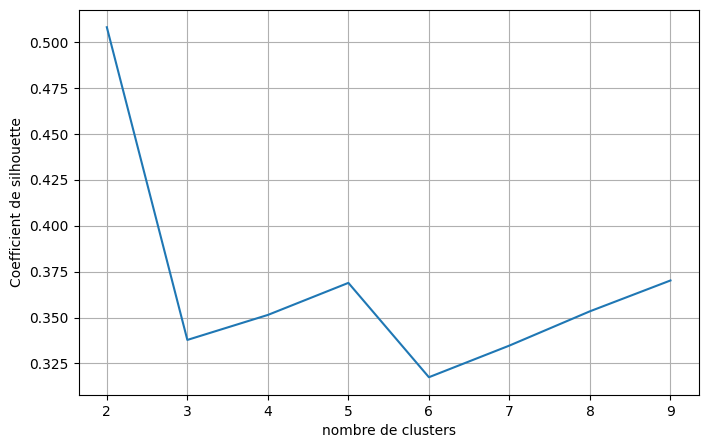

2 0.5079547944989173
3 0.3378070117291143
4 0.3514062980681987
5 0.36884927076588225
6 0.317515837251117
7 0.33474065934372593
8 0.35339071712202685


In [18]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(new2)
    tab_silhouette.append(silhouette_score(new2,cluster_labels))

fig = plt.figure(figsize=(8,5))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

for i in range(2,9):  
    print(i,tab_silhouette[i-2] )

La méthode des Coefficients de silhouette nous indique la plus haute valeur (0.36) à 5 clusters

### Librarie Yellowbrick

### Méthode de calinski harabasz

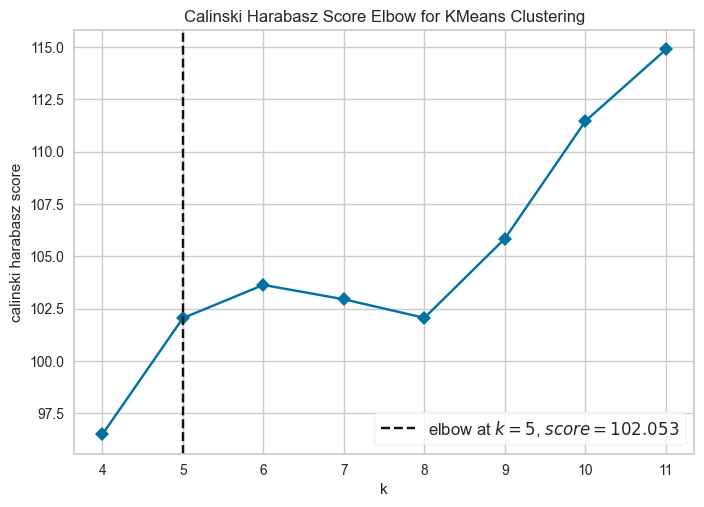

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=True
)

visualizer.fit(new2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

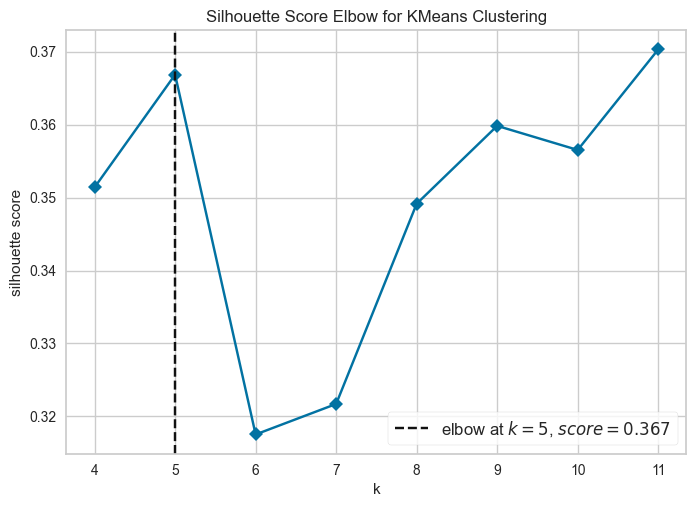

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(new2)       # Fit the data to the visualizer
visualizer.show()

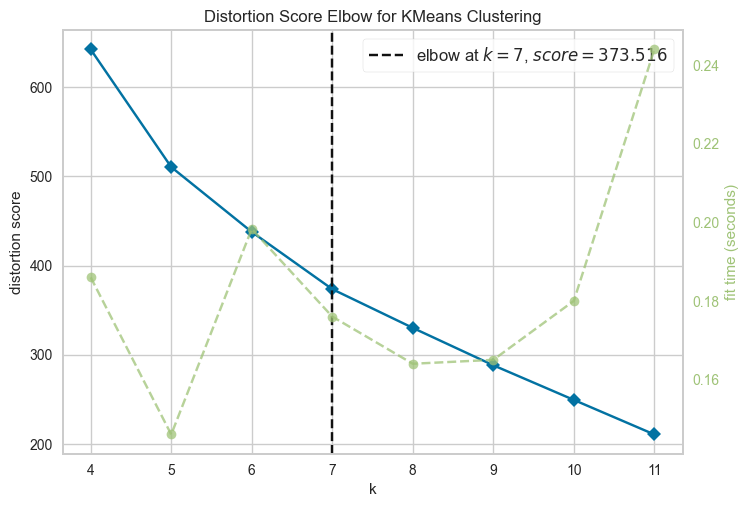

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(new2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Les différentes méthodes nous indiquent 5 clusters.

## Interprétation des centroïds

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(new2)

KMeans(n_clusters=5)

In [23]:
kmeans.labels_

array([2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 4, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       3, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 0, 3, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 4, 1, 2, 2, 1, 1, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 2])

On crée une colonne label_kmeans

In [24]:
new2["label_kmeans"] = kmeans.labels_
new2

Consommation  population/-Stabilité  Auto suffisance  \
Zone                                                         
AFG      -1.281284               2.826478         0.666217   
AGO      -1.003240               1.137784        -0.218745   
ALB      -1.016787              -0.397257        -0.450823   
ARE      -0.353096              -2.130925        -0.087835   
ARG       3.629914              -0.553012        -0.866179   
...            ...                    ...              ...   
WSM      -1.088326              -1.649199        -1.555651   
YEM      -1.013075               2.775755         0.766252   
ZAF       2.044282               0.250846        -0.341515   
ZMB      -0.857656               0.700642         0.146267   
ZWE      -0.928270               1.432199         0.160624   

      Dépendance à l’importation  label_kmeans  
Zone                                            
AFG                     0.922095             2  
AGO                     2.014904             2  
ALB                     0.160405             1  
ARE                     0.753561             1  
ARG                    -0.557244             0  
...                          ...           ...  
WSM                     1.055709             1  
YEM                     0.612886             2  
ZAF                    -0.023564             0  
ZMB                    -0.514238             2  
ZWE                    -0.146039             2  

[183 rows x 5 columns]

On récupère les coordonnées des centroïds

In [25]:
centroids = kmeans.cluster_centers_

In [26]:
centroids

array([[ 3.10574149e+00, -3.42030031e-01,  1.96773328e-01,
        -1.76640677e-01],
       [-5.19445869e-01, -1.46264505e+00, -4.13281206e-01,
        -4.27335954e-02],
       [-8.78840994e-01,  1.19648174e+00,  1.39977070e-01,
         2.38687653e-03],
       [ 1.13024864e+01,  2.87953004e+00, -1.51331439e+00,
         1.04557906e+00],
       [ 1.40839241e+00, -3.26328140e+00,  7.66460949e+00,
         1.87906585e+00]])

In [27]:
px.box(new2.sort_values('label_kmeans') , points =False, color = 'label_kmeans')

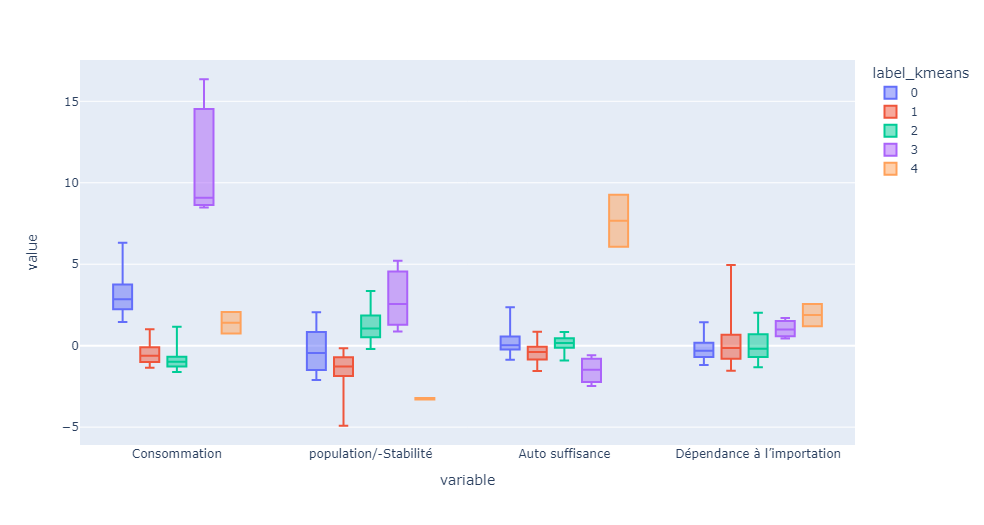

In [28]:
centroids_proj =  pd.DataFrame(centroids, columns = new2.columns[0:-1])
centroids_proj

Consommation  population/-Stabilité  Auto suffisance  \
0      3.105741              -0.342030         0.196773   
1     -0.519446              -1.462645        -0.413281   
2     -0.878841               1.196482         0.139977   
3     11.302486               2.879530        -1.513314   
4      1.408392              -3.263281         7.664609   

   Dépendance à l’importation  
0                   -0.176641  
1                   -0.042734  
2                    0.002387  
3                    1.045579  
4                    1.879066

Suite à ces résultats, nous retrouvons les clusters 0, 3 et 4 avec un marché déjà existant.

Les clusters 1 et 2 regroupent un petit marché.

Le cluster 3 est le plus consommateur, mais le plus instable, les clusters 0 et 4 sont plus stable avec un plus important taux d’auto-suffisance pour le 4

Bien que le cluster 3 pourrait représenter un plus gros marché, le cluster 0 semble être plus pertinent en vue de sa stabilité.

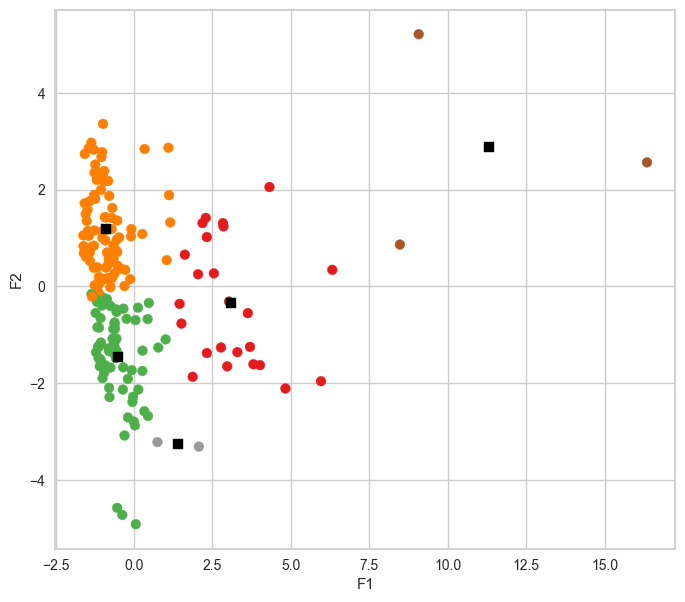

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(new2.iloc[:, 0], new2.iloc[:, 1], c= kmeans.labels_, cmap="Set1")
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [30]:
centroids_proj=centroids_proj.reset_index()
new2['label_kmeans'] = new2['label_kmeans'].astype("category")
fig = px.scatter_3d(x=new2.iloc[:,0], y=new2.iloc[:,1], z=new2.iloc[:,3],
              color=new2['label_kmeans'] ,hover_data = [new2.reset_index()["Zone"]], opacity=0.5, title = 'Projection des clusters et des centroîds' )
fig.add_scatter3d(x=centroids_proj.iloc[:,1], y=centroids_proj.iloc[:,2], z=centroids_proj.iloc[:,3], marker=dict(size=4,color="LightSeaGreen", symbol="x"), mode='markers', hovertext = centroids_proj['index'], name = 'Centroids' 
)
fig.show()

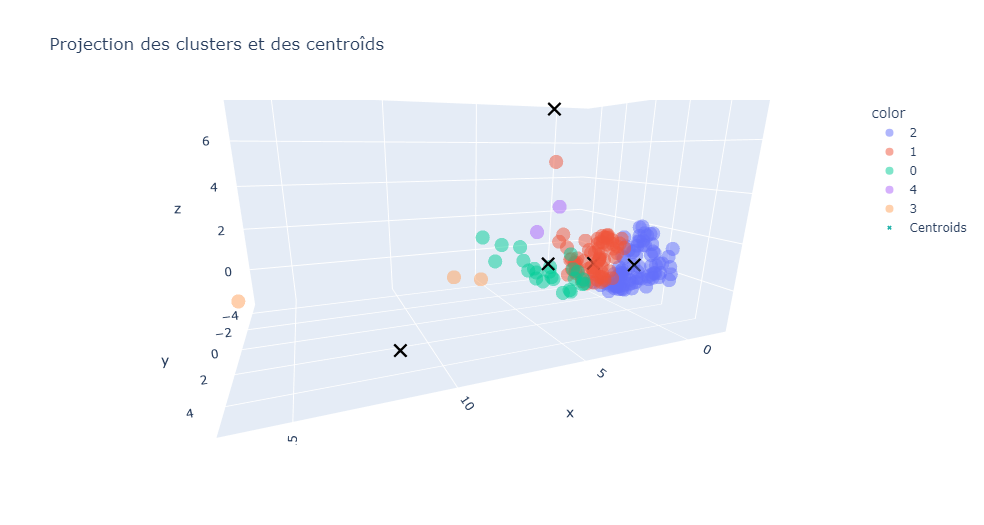

In [31]:
for i in range(5):
    print('Cluster', i)
    print(code[code['Code zone (ISO3)_'].isin(new2[new2.label_kmeans == i].index.tolist())]['Zone_'].tolist())
    print('-----------------------------------------')

Cluster 0
['Argentine', 'Australie', 'Canada', 'Colombie', 'Allemagne', 'Égypte', 'Espagne', 'France', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'République de Corée', 'Mexique', 'Myanmar', 'Malaisie', 'Philippines', 'Pologne', 'Arabie saoudite', 'Thaïlande', 'Turquie', 'Viet Nam', 'Afrique du Sud']
-----------------------------------------
Cluster 1
['Albanie', 'Émirats arabes unis', 'Arménie', 'Antigua-et-Barbuda', 'Autriche', 'Bulgarie', 'Bahamas', 'Bélarus', 'Barbade', 'Suisse', 'Chili', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Chypre', 'Tchéquie', 'Dominique', 'Danemark', 'Estonie', 'Finlande', 'Fidji', 'Gabon', 'Grèce', 'Grenade', 'Chine - RAS de Hong-Kong', 'Croatie', 'Hongrie', 'Irlande', 'Irlande', 'Islande', 'Israël', 'Kazakhstan', 'Saint-Kitts-et-Nevis', 'Koweït', 'Sainte-Lucie', 'Lituanie', 'Luxembourg', 'Lettonie', 'Chine - RAS de Macao', 'Maldives', 'Macédoine du Nord', 'Malte', 'Monténégro', 'Mong

# Choix des clusters

Suite aux deux approches de clustering, nous allons choisir les pays présents dans les deux clusters retenus et les visualiser sur les deux plans factoriels dans le but d’approfondir son analyse.

K-means : Cluster 0

CAH : cluster 1

In [32]:
new3 = data_pca_df.set_index('Zone')
new3['label_cah'] = new['label_cah']
new3['label_kmeans'] = kmeans.labels_

In [33]:
new3

Consommation  population/-Stabilité  Auto suffisance  \
Zone                                                         
AFG      -1.281284               2.826478         0.666217   
AGO      -1.003240               1.137784        -0.218745   
ALB      -1.016787              -0.397257        -0.450823   
ARE      -0.353096              -2.130925        -0.087835   
ARG       3.629914              -0.553012        -0.866179   
...            ...                    ...              ...   
WSM      -1.088326              -1.649199        -1.555651   
YEM      -1.013075               2.775755         0.766252   
ZAF       2.044282               0.250846        -0.341515   
ZMB      -0.857656               0.700642         0.146267   
ZWE      -0.928270               1.432199         0.160624   

      Dépendance à l’importation  label_cah  label_kmeans  
Zone                                                       
AFG                     0.922095          3             2  
AGO                     2.014904          3             2  
ALB                     0.160405          0             1  
ARE                     0.753561          0             1  
ARG                    -0.557244          1             0  
...                          ...        ...           ...  
WSM                     1.055709          0             1  
YEM                     0.612886          3             2  
ZAF                    -0.023564          1             0  
ZMB                    -0.514238          0             2  
ZWE                    -0.146039          3             2  

[183 rows x 6 columns]

In [34]:
clu_cross = pd.crosstab(new3.label_cah, new3.label_kmeans,margins=False)
clu_cross

label_kmeans   0   1   2  3  4
label_cah                     
0              3  67  41  0  0
1             20   0   4  0  0
2              1   0   0  3  0
3              0   0  42  0  0
4              0   0   0  0  2

Liste des pays retenus

In [35]:
clus = new3[(new3['label_cah'] == 1) & (new3['label_kmeans'] ==0)]
clus

Consommation  population/-Stabilité  Auto suffisance  \
Zone                                                         
ARG       3.629914              -0.553012        -0.866179   
AUS       1.872026              -1.867935        -0.369590   
CAN       2.972697              -1.652233        -0.055291   
DEU       4.828868              -2.110159         1.085481   
EGY       2.290385               1.415750         0.255369   
ESP       3.698891              -1.250131         0.082563   
FRA       3.807567              -1.608808         0.323396   
GBR       4.017749              -1.627794         0.486461   
IDN       4.320070               2.054098        -0.702606   
IRN       2.855740               1.240397        -0.074480   
ITA       3.297164              -1.359455         0.651452   
JPN       5.963303              -1.959644         0.993564   
KOR       2.324706              -1.377286         0.346213   
MMR       2.186466               1.308133        -0.512019   
PHL       2.323593               1.018828        -0.031003   
POL       2.774306              -1.262736         0.831861   
THA       2.548425               0.268503         2.353785   
TUR       2.836379               1.306886         0.739196   
VNM       3.031052              -0.312676        -0.274183   
ZAF       2.044282               0.250846        -0.341515   

      Dépendance à l’importation  label_cah  label_kmeans  
Zone                                                       
ARG                    -0.557244          1             0  
AUS                    -1.061090          1             0  
CAN                    -0.618447          1             0  
DEU                     0.928100          1             0  
EGY                    -0.417558          1             0  
ESP                    -0.331386          1             0  
FRA                     0.119224          1             0  
GBR                     0.852805          1             0  
IDN                     0.253344          1             0  
IRN                    -0.696225          1             0  
ITA                    -0.299313          1             0  
JPN                     1.435875          1             0  
KOR                    -0.309646          1             0  
MMR                    -0.234351          1             0  
PHL                     0.085501          1             0  
POL                    -1.025324          1             0  
THA                    -1.190352          1             0  
TUR                    -0.759751          1             0  
VNM                    -0.207409          1             0  
ZAF                    -0.023564          1             0

In [36]:
clus = clus.reset_index()
final = pd.merge(clus, code, right_on = 'Code zone (ISO3)_', left_on = 'Zone' , how = 'left' )
final.drop('Code zone (ISO3)_', axis = 1, inplace = True)

In [37]:
final[["Zone_", "Continent"]]

Zone_ Continent
0                                           Argentine  Americas
1                                           Australie   Oceania
2                                              Canada  Americas
3                                           Allemagne    Europe
4                                              Égypte    Africa
5                                             Espagne    Europe
6                                              France    Europe
7   Royaume-Uni de Grande-Bretagne et d'Irlande du...    Europe
8                                           Indonésie      Asia
9                      Iran (République islamique d')      Asia
10                                             Italie    Europe
11                                              Japon      Asia
12                                République de Corée      Asia
13                                            Myanmar      Asia
14                                        Philippines      Asia
15                                            Pologne    Europe
16                                          Thaïlande      Asia
17                                            Turquie      Asia
18                                           Viet Nam      Asia
19                                     Afrique du Sud    Africa

In [38]:
fig2 =px.choropleth(final, locations = 'Zone', color = 'Consommation', hover_data = ['Zone_'], title = 'Répartition des pays retenus')
fig2.show()

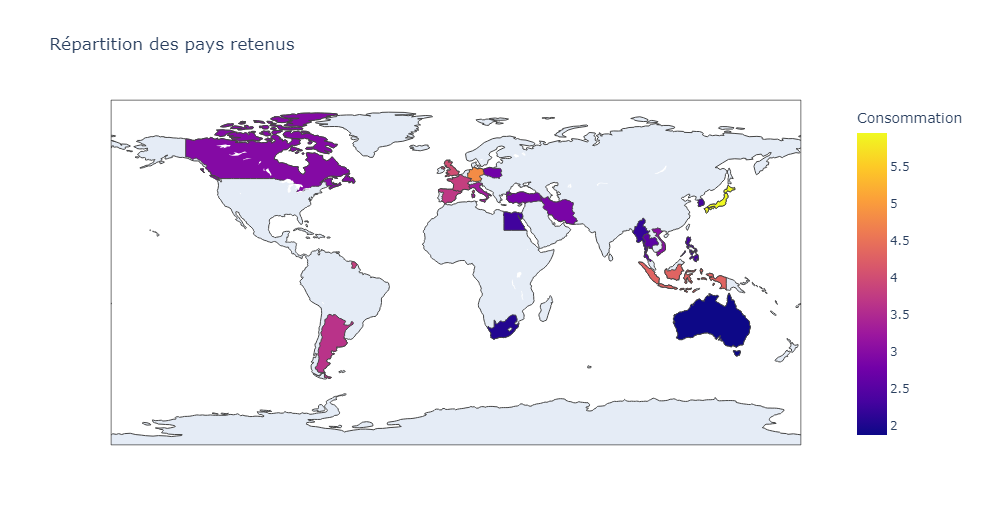

Pays en zone EU

In [39]:
final[final['Continent'] == 'Europe'].sort_values('Consommation',ascending = False)

Zone  Consommation  population/-Stabilité  Auto suffisance  \
3   DEU      4.828868              -2.110159         1.085481   
7   GBR      4.017749              -1.627794         0.486461   
6   FRA      3.807567              -1.608808         0.323396   
5   ESP      3.698891              -1.250131         0.082563   
10  ITA      3.297164              -1.359455         0.651452   
15  POL      2.774306              -1.262736         0.831861   

    Dépendance à l’importation  label_cah  label_kmeans  \
3                     0.928100          1             0   
7                     0.852805          1             0   
6                     0.119224          1             0   
5                    -0.331386          1             0   
10                   -0.299313          1             0   
15                   -1.025324          1             0   

                                                Zone_ Continent  
3                                           Allemagne    Europe  
7   Royaume-Uni de Grande-Bretagne et d'Irlande du...    Europe  
6                                              France    Europe  
5                                             Espagne    Europe  
10                                             Italie    Europe  
15                                            Pologne    Europe

Pays hors EU

In [40]:
final[~final['Continent'].isin(['Europe'])].sort_values("Consommation",ascending = False)

Zone  Consommation  population/-Stabilité  Auto suffisance  \
11  JPN      5.963303              -1.959644         0.993564   
8   IDN      4.320070               2.054098        -0.702606   
0   ARG      3.629914              -0.553012        -0.866179   
18  VNM      3.031052              -0.312676        -0.274183   
2   CAN      2.972697              -1.652233        -0.055291   
9   IRN      2.855740               1.240397        -0.074480   
17  TUR      2.836379               1.306886         0.739196   
16  THA      2.548425               0.268503         2.353785   
12  KOR      2.324706              -1.377286         0.346213   
14  PHL      2.323593               1.018828        -0.031003   
4   EGY      2.290385               1.415750         0.255369   
13  MMR      2.186466               1.308133        -0.512019   
19  ZAF      2.044282               0.250846        -0.341515   
1   AUS      1.872026              -1.867935        -0.369590   

    Dépendance à l’importation  label_cah  label_kmeans  \
11                    1.435875          1             0   
8                     0.253344          1             0   
0                    -0.557244          1             0   
18                   -0.207409          1             0   
2                    -0.618447          1             0   
9                    -0.696225          1             0   
17                   -0.759751          1             0   
16                   -1.190352          1             0   
12                   -0.309646          1             0   
14                    0.085501          1             0   
4                    -0.417558          1             0   
13                   -0.234351          1             0   
19                   -0.023564          1             0   
1                    -1.061090          1             0   

                             Zone_ Continent  
11                           Japon      Asia  
8                        Indonésie      Asia  
0                        Argentine  Americas  
18                        Viet Nam      Asia  
2                           Canada  Americas  
9   Iran (République islamique d')      Asia  
17                         Turquie      Asia  
16                       Thaïlande      Asia  
12             République de Corée      Asia  
14                     Philippines      Asia  
4                           Égypte    Africa  
13                         Myanmar      Asia  
19                  Afrique du Sud    Africa  
1                        Australie   Oceania

Répartition des pays retenus sur les deux premiers plans factoriels :

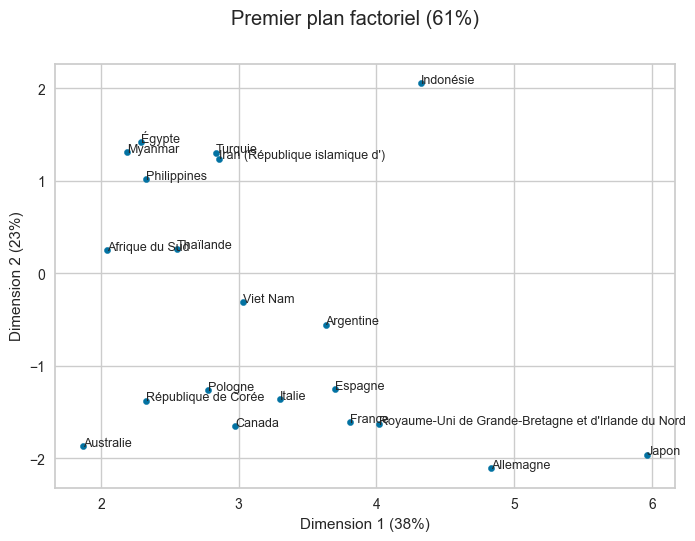

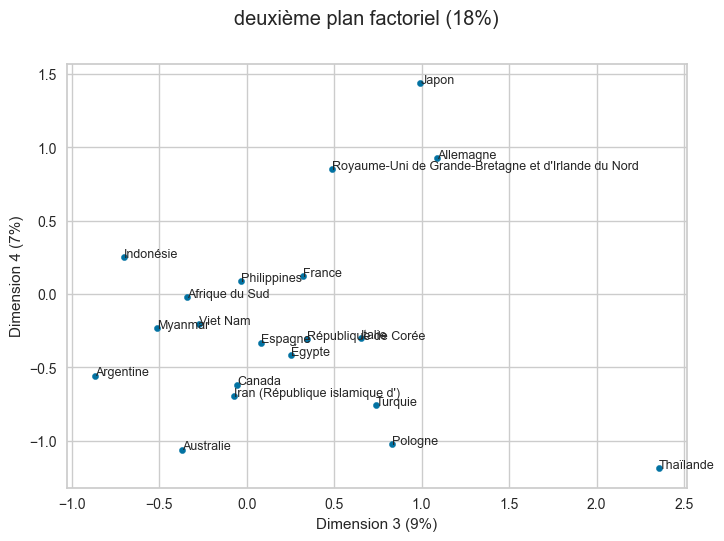

In [41]:
%%capture --no-display
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
final.plot.scatter("Consommation", "population/-Stabilité", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in final.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Consommation']) > 0) | (abs(k[1]['population/-Stabilité']) > 0):
        ax.annotate(k[1]["Zone_"], (k[1]['Consommation'], k[1]['population/-Stabilité']), fontsize = 9)
plt.xlabel("Dimension 1 (38%)") 
plt.ylabel("Dimension 2 (23%)")
plt.suptitle("Premier plan factoriel (61%)")
plt.show()

# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
final.plot.scatter("Auto suffisance", "Dépendance à l’importation", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in final.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Auto suffisance']) >0) | (abs(k[1]['Dépendance à l’importation']) >0):
        ax.annotate(k[1]["Zone_"], (k[1]['Auto suffisance'], k[1]['Dépendance à l’importation']), fontsize = 9)
plt.xlabel("Dimension 3 (9%)") 
plt.ylabel("Dimension 4 (7%)")
plt.suptitle("deuxième plan factoriel (18%)")
plt.show()

Nous avons quelques groupes qui se distinguent :

Japon, Allemagne, Grande-Bretagne, Indonésie : gros consommateur de viande et une forte dépendance à l’importation, l’Indonésie est la plus instable politiquement avec plus de besoins en vue du faible taux d’autosuffisance.

Argentin et Viet Nam sont très similaire en termes de consommation de stabilité et sur les taux de TSA et TDI.

Egypte, Turquie, Philippine, Iran, Myanmar, Afrique du Sud et Thaïlande constitue un plus petit marché plus instable que le reste des groupes.

Espagne, Italie, Canada, Pologne, république de Corée, Australie, sont très similaire sur la stabilité politique et les taux TAS TDI, mais avec plus de consommation pour l'Espagne, Italie et le Canada